# ADCIRC Setup Data
Testbed for grabbing and analyzing real-time IRLSetup forecast (in cm) from the daily ADCIRC runs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline

In [26]:
data_url = 'https://raw.githubusercontent.com/FL-ASGS/ECFL-IRL/master/IRLsetup.asgs.nam/IRLsetup.txt'
col_names = ['Date', 'Time', 'TZ', 'Setup']
ADCIRC_setup = pd.read_fwf(data_url, header=None, names=col_names)

In [27]:
# Create DateTime column, and make the dataframe a time series
ADCIRC_setup['DateTime'] = ADCIRC_setup['Date'] + ' ' + ADCIRC_setup['Time']
ADCIRC_setup['DateTime'] = pd.to_datetime(ADCIRC_setup['DateTime'], 
                                         utc=True)

In [28]:
# Set DateTime as the index and drop unnecessary columns
ADCIRC_setup = ADCIRC_setup.set_index(ADCIRC_setup['DateTime'])
ADCIRC_setup = ADCIRC_setup.drop(['Date', 'Time', 'TZ'], 
                                 axis=1)

In [39]:
ADCIRC_setup.head(10)

,Setup,DateTime
DateTime,,
2017-09-28 00:15:00,0.052741,2017-09-28 00:15:00
2017-09-28 00:30:00,0.057340,2017-09-28 00:30:00
2017-09-28 00:45:00,0.067909,2017-09-28 00:45:00
2017-09-28 01:00:00,0.074781,2017-09-28 01:00:00
2017-09-28 01:15:00,0.077227,2017-09-28 01:15:00
2017-09-28 01:30:00,0.082159,2017-09-28 01:30:00
2017-09-28 01:45:00,0.086052,2017-09-28 01:45:00
2017-09-28 02:00:00,0.089570,2017-09-28 02:00:00
2017-09-28 02:15:00,0.095565,2017-09-28 02:15:00


/Users/bph/anaconda/lib/python3.6/site-packages/plotnine/scales/scale.py:87: UserWarning: scale_x_datetime could not recognise parameter `date_breaks`
  warn(msg.format(self.__class__.__name__, k))


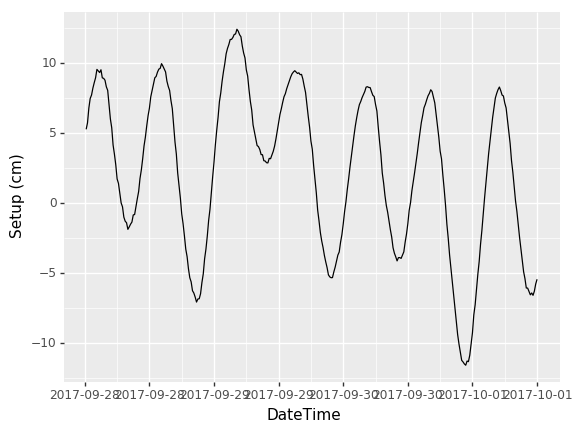

<ggplot: (7001192740)>

In [38]:
(ggplot(data=ADCIRC_setup, mapping=aes(x='DateTime', y='Setup * 100'))
 + geom_line() + ylab('Setup (cm)')
 + scale_x_datetime(date_breaks='1 days'))